# **PNAS2020**


This script is an example file showing how to import atmospheric river data from Github used in the paper entitled: ***Seasonal Prediction of western North America Atmospheric Rivers ***. One should notice that due to the storage limitation of Github and policy of GFDL, all files are saved with a post-process form (i.e., AR). If you are interested in the raw data for detecting ARs (e.g., u, v and q), please contact corresponding author **Kai-Chih Tseng**: kaichiht@princeton.edu


Code instruction:

1.   Please copy this file to your googledrive (or local machine) before using it
2.  ram for analyzing this data can't be less than 25GB



## Step 1: Setup environment

In [1]:
# environment setup
!pip install netcdf4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from netCDF4 import Dataset as NetCDFFile
import random 
import timeit
import pickle
from scipy import stats
!pip install wget
import wget

     |████████████████████████████████| 4.3MB 2.7MB/s 
     |████████████████████████████████| 296kB 51.2MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=2646278c26d10ce1c6fd5697c71b73eac754e90ee2a47682c8cbccf403299d3f
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


## Step 2: retrieve data from Github
after executing this part, you should have two variables "AR anomaly" from (1) SPEAR with dimension (initial season, ens, initial year, forecast time, lat, lon) and (2)


*   season = Jan, Apr, Jul, Oct
*   ens    = 15 ensemble members
*   initial year  = 1995-2017
*   forecast time = 0-11 months
*   lat           = 20N-89.25N
*   lon           = 100E-60W


In [3]:
# clear current folder
import glob, os
for f in glob.glob("*.npz"):
    os.remove(f)

# define the variables
# clear existing variable in case of duplication
if 'pcs' in locals():
    del pcs
if 'EOF' in locals():
    del EOF
if 'AR_anomaly' in locals():
    del AR_anomaly

pcs        = np.zeros((1000,16560))
EOF        = np.zeros((1000,139,319))

# downloading data from Github
for i in range(1,5):
    url='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF'+str(i)+'.npz'
    print(url)
    filename         = wget.download(url)
    data             = np.load('/content/model_EOF'+str(i)+'.npz')
    EOF[250*(i-1):250*(i-1)+250] = data['EOF']
EOF = np.reshape(EOF,[1000,139*319])

for i in range(1,3):
    url='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs'+str(i)+'.npz'
    print(url)
    filename         = wget.download(url)
    data             = np.load('/content/model_pcs'+str(i)+'.npz')
    pcs[500*(i-1):500*(i-1)+500] = data['pcs_ar']

AR_anomaly_model = np.matmul(np.transpose(pcs),EOF)
AR_anomaly_model = np.reshape(AR_anomaly_model,[4,15,23,12,139,319])




https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF1.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF2.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF3.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF4.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs1.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs2.npz


## Step 3: Data Visualization

([<matplotlib.axis.XTick at 0x7faaa5bcc518>,
 [Text(0, 0, '$120^oE$'),
  Text(0, 0, '$150^oE$'),
  Text(0, 0, '$180^oE$'),
  Text(0, 0, '$150^oW$'),
  Text(0, 0, '$120^oW$'),
  Text(0, 0, '$90^oW$'),
  Text(0, 0, '$60^oW$')])

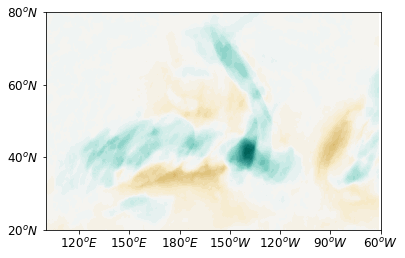

In [59]:
# visualize the model AR anomaly
clevs   = np.arange(-0.24,0.25,0.01)
y       = np.arange(20,89.75-0.5,0.5)
x       = np.arange(100,300-0.625,0.625)
lat,lon = np.meshgrid(y,x)

plt.figure()
plt.contourf(x,y,AR_anomaly[0,:,0,0,:,:].mean(axis=0),clevs,cmap='BrBG')
plt.xlim(100,300)
plt.xticks([120,150,180,210,240,270], [],fontsize=15)
plt.ylim(20,75)
plt.yticks([20,40,60,80], ['$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=12)
plt.xticks([120,150,180,210,240,270,300], ['$120^oE$', '$150^oE$', '$180^oE$', '$150^oW$', '$120^oW$','$90^oW$','$60^oW$'],fontsize=12)

# visualize the EAR5 AR anomaly    

In [47]:
np.shape(AR_anomaly)

(4, 15, 23, 12, 139, 319)